<a href="https://colab.research.google.com/github/hasanocal7/Kur_3/blob/main/KNN_ve_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("wifi_localization.txt", sep="\t", header = None)

In [3]:
df.columns = ['wifi1', 'wifi2', 'wifi3', 'wifi4','wifi5','wifi6','wifi7', 'Room']
df.head()

,wifi1,wifi2,wifi3,wifi4,wifi5,wifi6,wifi7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


<Axes: >

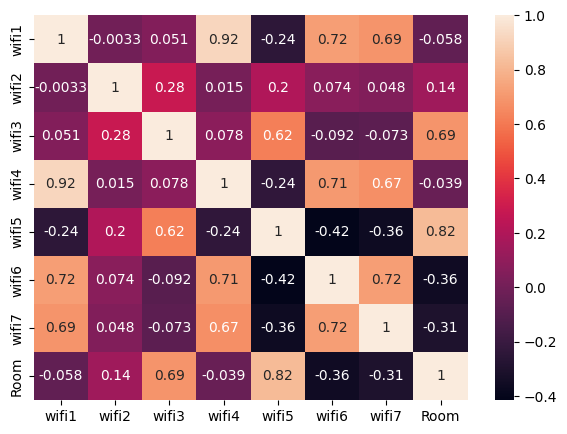

In [6]:
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(), annot = True)

<Axes: xlabel='wifi6', ylabel='wifi5'>

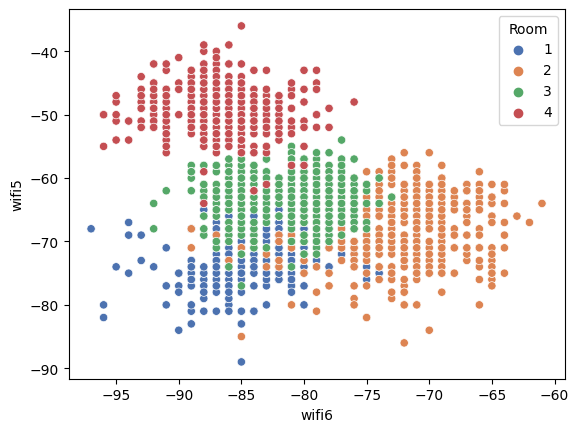

In [11]:
sns.scatterplot(df,
                x = 'wifi6',
                y = 'wifi5',
                hue = 'Room',
                palette = 'deep') # hue parametresi genelde target feature kullanılır.

#Boyut İndirgeme Teknikleri (PCA - LDA - t-SNE)

#PCA

In [12]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2, random_state = 53)

In [15]:
X = df.drop('Room', axis = 1)
y = df['Room']

In [18]:
pca_result = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_result, columns = ['Component 1', 'Component 2'])
pca_df['Room'] = y
pca_df

,Component 1,Component 2,Room
0,-13.420580,14.121511,1
1,-17.354605,14.091161,1
2,-14.205887,17.789814,1
3,-9.886346,20.566852,1
4,-11.146006,18.489701,1
...,...,...,...
1995,-19.683483,-11.314212,4
1996,-16.896809,-13.850302,4
1997,-20.510498,-15.751400,4
1998,-18.781045,-17.510348,4


<Axes: xlabel='Component 1', ylabel='Component 2'>

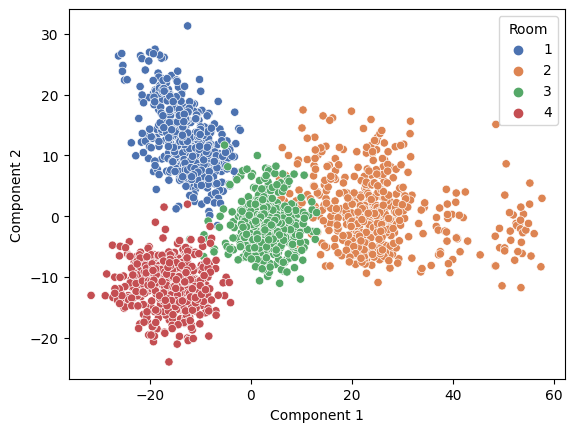

In [21]:
sns.scatterplot(pca_df,
               x = 'Component 1',
               y = 'Component 2',
               hue = 'Room',
               palette = 'deep')

In [22]:
# LDA ve t-SNE'de de aynı işlemler uygulanıyor

#Model Eğitimi

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 53, shuffle = True)

#KNN Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn_model = KNeighborsClassifier(n_neighbors = 3)

In [29]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = knn_model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [37]:
accuracy_score(y_test, y_pred)

0.9925

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99       106
           2       1.00      1.00      1.00        93
           3       1.00      0.97      0.98       101
           4       0.99      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [40]:
confusion_matrix(y_test, y_pred)

array([[106,   0,   0,   0],
       [  0,  93,   0,   0],
       [  2,   0,  98,   1],
       [  0,   0,   0, 100]])

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
cross_val_score(knn_model, X, y, cv = 5).mean()

0.9795

# SVC

In [44]:
from sklearn.svm import SVC

In [46]:
svc_model = SVC(C = 10)

In [47]:
svc_model.fit(X_train, y_train)

SVC(C=10)

In [48]:
y_pred = svc_model.predict(X_test)

In [49]:
accuracy_score(y_test, y_pred)

0.9925

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       106
           2       1.00      0.98      0.99        93
           3       0.98      0.99      0.99       101
           4       0.99      1.00      1.00       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [51]:
confusion_matrix(y_test, y_pred)

array([[106,   0,   0,   0],
       [  0,  91,   2,   0],
       [  0,   0, 100,   1],
       [  0,   0,   0, 100]])

In [52]:
cross_val_score(svc_model, X, y, cv = 5).mean()

0.9775